## Linear Regession

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA 606 Capstone Project/Datasets and Information/CSVs/ML_dataset.csv')

In [ ]:
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
#plt.figure(figsize=(20 ,20))
for year in years:
  print(year)  
  df_year = df[df['period_begin'].str.contains(year)].drop('Unnamed: 0', axis=1)
  correlated = df_year.corr()
  correlated.style.background_gradient(cmap='coolwarm')
  plt.matshow(correlated)
  plt.show()

In [ ]:
plt.figure(figsize=(50,10))

model = LinearRegression()

target = 'median_sale_price'

<Figure size 3600x720 with 0 Axes>

2012
X_train Shape:  (280940, 26)
X_test Shape: (70236, 26)
Y_train Shape: (280940, 1)
Y_test Shape: (70236, 1)


The model performance for training set
--------------------------------------
RMSE is 70970.18691846695
R2 score is 0.8049504926465654


The model performance for testing set
--------------------------------------
RMSE is 70056.61822363953
R2 score is 0.8093052031534365


-------------------------------------------------
-------------------------------------------------


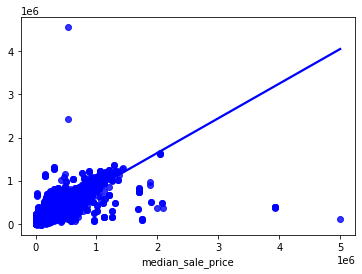

2013
X_train Shape:  (279600, 26)
X_test Shape: (69901, 26)
Y_train Shape: (279600, 1)
Y_test Shape: (69901, 1)


The model performance for training set
--------------------------------------
RMSE is 59116.82740605136
R2 score is 0.8674635237855503


The model performance for testing set
--------------------------------------
RMSE is 60861.00472403095
R2 score is 0.861690766197672


-------------------------------------------------
-------------------------------------------------


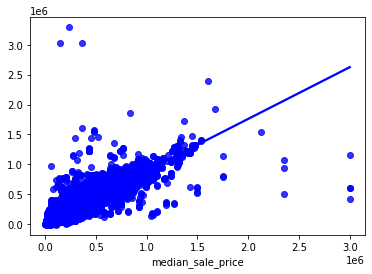

2014
X_train Shape:  (279298, 26)
X_test Shape: (69825, 26)
Y_train Shape: (279298, 1)
Y_test Shape: (69825, 1)


The model performance for training set
--------------------------------------
RMSE is 69491.19311245016
R2 score is 0.8302091447405778


The model performance for testing set
--------------------------------------
RMSE is 63484.28147560402
R2 score is 0.853092533876431


-------------------------------------------------
-------------------------------------------------


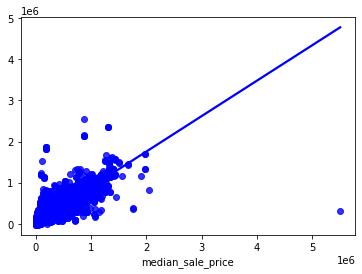

2015
X_train Shape:  (281282, 25)
X_test Shape: (70321, 25)
Y_train Shape: (281282, 1)
Y_test Shape: (70321, 1)


The model performance for training set
--------------------------------------
RMSE is 117736.65009550717
R2 score is 0.4954948054273909


The model performance for testing set
--------------------------------------
RMSE is 124006.09436222767
R2 score is 0.47407137221286977


-------------------------------------------------
-------------------------------------------------


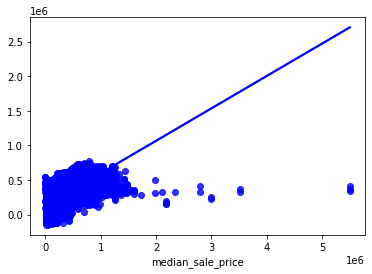

2016
X_train Shape:  (282001, 25)
X_test Shape: (70501, 25)
Y_train Shape: (282001, 1)
Y_test Shape: (70501, 1)


The model performance for training set
--------------------------------------
RMSE is 111694.33885541186
R2 score is 0.5398763504005322


The model performance for testing set
--------------------------------------
RMSE is 111752.0928664024
R2 score is 0.5303659739431039


-------------------------------------------------
-------------------------------------------------


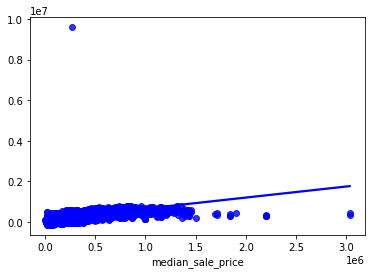

2017
X_train Shape:  (282804, 26)
X_test Shape: (70702, 26)
Y_train Shape: (282804, 1)
Y_test Shape: (70702, 1)


The model performance for training set
--------------------------------------
RMSE is 79691.88286682077
R2 score is 0.7810301189415372


The model performance for testing set
--------------------------------------
RMSE is 69984.95268996328
R2 score is 0.8313407830837609


-------------------------------------------------
-------------------------------------------------


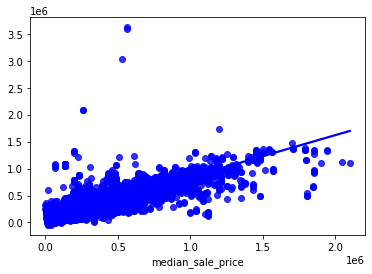

2018
X_train Shape:  (284082, 26)
X_test Shape: (71021, 26)
Y_train Shape: (284082, 1)
Y_test Shape: (71021, 1)


The model performance for training set
--------------------------------------
RMSE is 74666.77609035851
R2 score is 0.8156407155063432


The model performance for testing set
--------------------------------------
RMSE is 70264.09080728231
R2 score is 0.8342921284201062


-------------------------------------------------
-------------------------------------------------


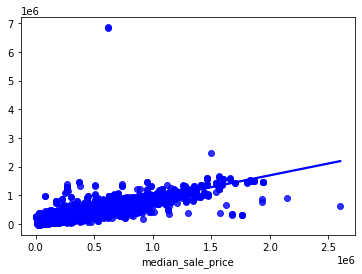

2019
X_train Shape:  (282905, 26)
X_test Shape: (70727, 26)
Y_train Shape: (282905, 1)
Y_test Shape: (70727, 1)


The model performance for training set
--------------------------------------
RMSE is 72069.40914371588
R2 score is 0.8355465829693085


The model performance for testing set
--------------------------------------
RMSE is 72590.8726724262
R2 score is 0.8330411504741911


-------------------------------------------------
-------------------------------------------------


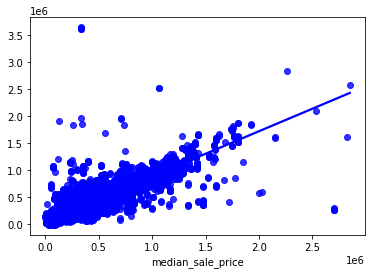

2020
X_train Shape:  (283320, 26)
X_test Shape: (70831, 26)
Y_train Shape: (283320, 1)
Y_test Shape: (70831, 1)


The model performance for training set
--------------------------------------
RMSE is 79312.85380322955
R2 score is 0.8359313294073204


The model performance for testing set
--------------------------------------
RMSE is 86492.46318646388
R2 score is 0.8135289065879963


-------------------------------------------------
-------------------------------------------------


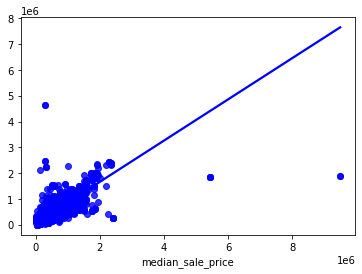

2021
X_train Shape:  (288556, 26)
X_test Shape: (72140, 26)
Y_train Shape: (288556, 1)
Y_test Shape: (72140, 1)


The model performance for training set
--------------------------------------
RMSE is 72889.19765083848
R2 score is 0.8855597328642886


The model performance for testing set
--------------------------------------
RMSE is 70883.08971855606
R2 score is 0.8913730733310071


-------------------------------------------------
-------------------------------------------------


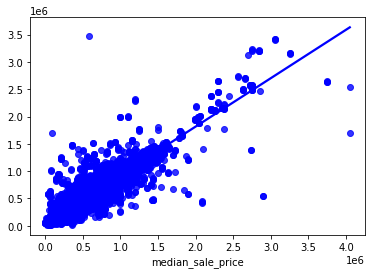

In [ ]:
years_single = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for year in years_single:
  print(year)
  
  df_year = df[df['period_begin'].str.contains(year)].drop('Unnamed: 0', axis=1)
  correlated = df_year.corr()
  #print(correlated)
  
  column_list=[]
  for i, r in correlated.iterrows():
    for x in correlated.columns:
      if i == x:
        next
      elif correlated.loc[i][x]>.35:
        #print(i," at ",x,": ",correlated[i][x])
        column_list.append(i)
        column_list.append(x)

  checker = np.array(column_list)
  cols = np.unique(checker).tolist()
  len(cols)
  cols = cols +['desert','property_type']
  #print(cols)



  main_df = df_year[cols].dropna()

  df_dummy = pd.get_dummies(data=main_df, drop_first=True)

  X = df_dummy.drop('median_sale_price', axis=1)
  Y = df_dummy[['median_sale_price']]

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
  print("X_train Shape: ",X_train.shape)
  print("X_test Shape:",X_test.shape)
  print("Y_train Shape:",Y_train.shape)
  print("Y_test Shape:",Y_test.shape)
  print("\n")

  
  model.fit(X_train, Y_train)
  y_train_predict = model.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  year_dict = {'Year':year,
              'RMSE':rmse,
              'R2':r2}
  lin_results = lin_results.append(year_dict, ignore_index=True)

  # model evaluation for testing set
  y_test_predict = model.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n") 
  print("-------------------------------------------------")
  print("-------------------------------------------------")

  sns.regplot(x=Y_test, y=y_test_predict, ci=None, color="b")

  plt.show()


lin_results
  


2012|2013|2014
X_train Shape:  (839840, 26)
X_test Shape: (209960, 26)
Y_train Shape: (839840, 1)
Y_test Shape: (209960, 1)


The model performance for training set
--------------------------------------
RMSE is 67522.73477329582
R2 score is 0.8326291939951718


The model performance for testing set
--------------------------------------
RMSE is 62828.438620280765
R2 score is 0.8500024437894426


-------------------------------------------------
-------------------------------------------------


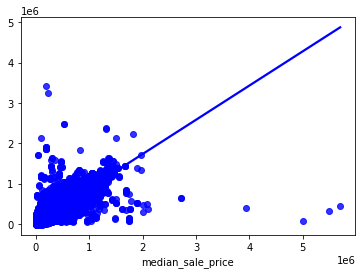

2015|2016|2017
X_train Shape:  (846197, 25)
X_test Shape: (211550, 25)
Y_train Shape: (846197, 1)
Y_test Shape: (211550, 1)


The model performance for training set
--------------------------------------
RMSE is 119639.6277512027
R2 score is 0.49238549298042755


The model performance for testing set
--------------------------------------
RMSE is 117231.53766141622
R2 score is 0.5031620133848689


-------------------------------------------------
-------------------------------------------------


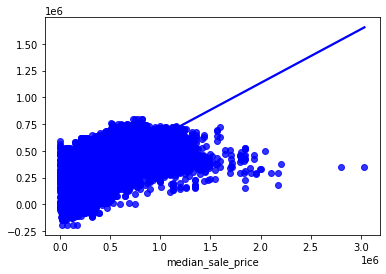

2018|2019|2020|2021
X_train Shape:  (1138865, 26)
X_test Shape: (284717, 26)
Y_train Shape: (1138865, 1)
Y_test Shape: (284717, 1)


The model performance for training set
--------------------------------------
RMSE is 76228.42012231049
R2 score is 0.8474155620283246


The model performance for testing set
--------------------------------------
RMSE is 76912.2274758545
R2 score is 0.8428679125368945


-------------------------------------------------
-------------------------------------------------


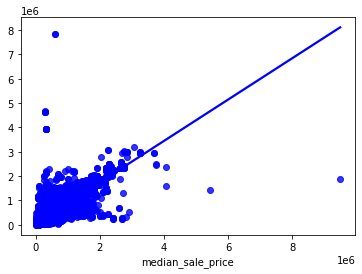

,Year,RMSE,R2
0,2012|2013|2014,67522.734773,0.832629
1,2015|2016|2017,119639.627751,0.492385
2,2018|2019|2020|2021,76228.420122,0.847416


In [ ]:
years_bucket= ['2012|2013|2014','2015|2016|2017','2018|2019|2020|2021']
lin_results = pd.DataFrame(columns=['Year','RMSE','R2'])

for year in years_bucket:
  print(year)
  
  df_year = df[df['period_begin'].str.contains(year)].drop('Unnamed: 0', axis=1)
  correlated = df_year.corr()
  #print(correlated)
  
  column_list=[]
  for i, r in correlated.iterrows():
    for x in correlated.columns:
      if i == x:
        next
      elif correlated.loc[i][x]>.35:
        #print(i," at ",x,": ",correlated[i][x])
        column_list.append(i)
        column_list.append(x)

  checker = np.array(column_list)
  cols = np.unique(checker).tolist()
  len(cols)
  cols = cols +['desert','property_type']
  #print(cols)



  main_df = df_year[cols].dropna()

  df_dummy = pd.get_dummies(data=main_df, drop_first=True)

  X = df_dummy.drop('median_sale_price', axis=1)
  Y = df_dummy[['median_sale_price']]

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
  print("X_train Shape: ",X_train.shape)
  print("X_test Shape:",X_test.shape)
  print("Y_train Shape:",Y_train.shape)
  print("Y_test Shape:",Y_test.shape)
  print("\n")

  
  model.fit(X_train, Y_train)
  y_train_predict = model.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  year_dict = {'Year':year,
                'RMSE':rmse,
                'R2':r2}
  lin_results = lin_results.append(year_dict, ignore_index=True)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  y_test_predict = model.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n") 
  print("-------------------------------------------------")
  print("-------------------------------------------------")

  
  sns.regplot(x=Y_test, y=y_test_predict, ci=None, color="b")

  plt.show()

lin_results